In [1]:
# calculate annual total emission from fossil fuel, ocean, terrestrial

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

from matplotlib import rcParams
rcParams["savefig.dpi"] = 300
rcParams["font.size"] = 12

import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from util.functions import area_latlon
from util.gamap_colormap import WhGrYlRd

In [4]:
annual_total_names = ['Fossil fuel', 'Terrestrial', 'Ocean', 'Fire']
annual_totals      = np.zeros(len(annual_total_names))
annual_totals

array([0., 0., 0., 0.])

In [5]:
# EDGAR
input_dir = '/exports/csce/datastore/geos/users/msadiq/EDGARv5'
year_vec = [2016,2017,2018]
lat_res = 0.1
lon_res = 0.1
varname = 'emi_co2'
fname1 = '/v50_CO2_excl_short-cycle_org_C_'
fname2 = '.0.1x0.1.nc'
output_edgar = np.zeros(3)

In [6]:
for i, iyear in enumerate(year_vec):
    ds_EDGAR = xr.open_dataset(input_dir + 
                               fname1 +
                               str(iyear) + 
                               fname2)
    data = ds_EDGAR[varname].copy()
    
    for ilat, lat in enumerate(data.lat):
        area_tmp = area_latlon(lat1 = lat, 
                               lon1 = data.lon[10].values, 
                               lat2 = lat + lat_res, 
                               lon2 = data.lon[10].values + lon_res)
        if(iyear == 2016):
            data[ilat,:] = data[ilat,:] * area_tmp *3600*24*366*1e6 # unit: kgCO2/yr
        else:
            data[ilat,:] = data[ilat,:] * area_tmp *3600*24*365*1e6 # unit: kgCO2/yr
    annual_edgar = data.copy()
    total_edgar = data.sum()   # kgCO2/year, same as data description
    ann_total = total_edgar.values                # kg/yr
    ann_total_C = total_edgar.values*1e-12*12/44  # GtC/yr
    
    print(str(iyear))
    print('annual total from EDGAR team:')
    print(data.attrs['total_emi_co2'])
    print('annual total from this calculation:')
    print(' ',ann_total)
    print(' ')
    #print('total ffCO2 emission (GtC/yr)  : ', ann_total_C)
    
    output_edgar[i] = ann_total_C

2016
annual total from EDGAR team:
   3.67531e+013 kg/year
annual total from this calculation:
  36732390000000.0
 
2017
annual total from EDGAR team:
   3.71787e+013 kg/year
annual total from this calculation:
  37157863000000.0
 
2018
annual total from EDGAR team:
   3.78867e+013 kg/year
annual total from this calculation:
  37865078000000.0
 


In [7]:
annual_totals[0] = output_edgar[2]

In [9]:
# Terrestrial
input_dir = '/geos/d21/GC_DATA/HEMCO/'
fname = 'CO2/v2015-04/BIO/Net_terrestrial_exch_5.29Pg.generic.1x1.nc'
ds_ter  = xr.open_dataset(input_dir+fname)

# year 2000
lat_res = ds_ter.attrs['Delta_Lat']
lon_res = ds_ter.attrs['Delta_Lon']
varname = 'CO2'
unit    = ds_ter[varname].attrs['units']
unit

'kg/m2/s'

In [10]:
data = ds_ter[varname].copy()
for ilat, lat in enumerate(data.lat):
    area_tmp = area_latlon(lat1 = lat, 
                            lon1 = data.lon[10].values, 
                            lat2 = lat + lat_res, 
                            lon2 = data.lon[10].values + lon_res)
    data[0,ilat,:] = data[0,ilat,:] * area_tmp *3600*24*366*1e6 # unit: kgCO2/yr
total = data.sum()   # kgCO2/year, same as data description
ann_total = total.values  # kg/yr
ann_total_C = total.values*1e-12*12/44  # GtC/yr
    
print('annual total from this calculation:')
print(' ',ann_total_C)
print(' ')

annual total from this calculation:
  -5.269060654917819
 


In [11]:
annual_totals[1] = ann_total_C

In [12]:
#  OCEAN
input_dir = '/geos/d21/GC_DATA/HEMCO/'
fname     = 'CO2/v2015-04/OCEAN/Scaled_Ocean_CO2_monthly.nc'
ds_ocean  = xr.open_dataset(input_dir+fname)

# year range: 2000 - 2013, get 2013 for this calculation
lat_res = ds_ocean.attrs['Delta_Lat']
lon_res = ds_ocean.attrs['Delta_Lon']
varname = 'CO2'
unit    = ds_ocean[varname].attrs['units']
unit
#output_edgar = np.zeros(3)

'kg/m2/s'

In [13]:
ds_ocean[varname]

<xarray.DataArray 'CO2' (time: 168, lat: 45, lon: 72)>
[544320 values with dtype=float32]
Coordinates:
  * lon      (lon) int32 -180 -175 -170 -165 -160 -155 ... 155 160 165 170 175
  * lat      (lat) float32 -88.0 -84.0 -80.0 -76.0 -72.0 ... 76.0 80.0 84.0 88.0
  * time     (time) datetime64[ns] 2000-01-01 2000-02-01 ... 2013-12-01
Attributes:
    long_name:  Scaled Ocean CO2 flux from Takahashi et al.
    units:      kg/m2/s

In [14]:
data = ds_ocean[varname][156:168,:,:].copy()

days_in_month = [31,28,31,30,31,30,31,31,30,31,30,31]

for ilat, lat in enumerate(data.lat):
    for imonth in range(12):
        area_tmp = area_latlon(lat1 = lat, 
                                lon1 = data.lon[10].values, 
                                lat2 = lat + lat_res, 
                                lon2 = data.lon[10].values + lon_res)
        data[imonth, ilat,:] = data[imonth, ilat,:] * area_tmp * days_in_month[imonth] *3600 *24 *1e6 # unit: kgCO2/month

total = data.sum()         # kgCO2/year, same as data description
ann_total = total.values                # kg/yr
ann_total_C = total.values*1e-12*12/44  # GtC/yr

print('annual total from this calculation:')
print(' ',ann_total_C)
print(' ')

annual total from this calculation:
  -2.6329068458356364
 


In [15]:
annual_totals[2] = ann_total_C

In [16]:
# Biosphere, SiB3 balanced Net Ecosystem Production (NEP) CO2
fname = 'CO2/v2015-04/BIO/SiB3_3hr_NEP.nc'
ds_bio  = xr.open_dataset(input_dir+fname)

# year range: 2006 - 2010, get 2010 for this calculation
lat_res = ds_ocean.attrs['Delta_Lat']
lon_res = ds_ocean.attrs['Delta_Lon']
varname = 'CO2'
unit    = ds_ocean[varname].attrs['units']
unit

'kg/m2/s'

In [17]:
begin = 4*8*365+8
end   = 5*8*365+8
data = ds_bio[varname][begin:end,:,:].copy()

In [18]:
range(len(data.time))

range(0, 2920)

In [19]:
#for itime in range(len(data.time)):
#    for ilat, lat in enumerate(data.lat):
#        area_tmp = area_latlon(lat1 = lat, 
#                                lon1 = data.lon[10].values, 
#                                lat2 = lat + lat_res, 
#                                lon2 = data.lon[10].values + lon_res)
#        data[itime, ilat,:] = data[itime, ilat,:] * area_tmp * 3* 3600 # unit: kgCO2/3hours
#total = data.sum()          # kgCO2/year, same as data description
#ann_total = total.values*1e-12*12/44 # GtC/yr
    
#print('annual total from this calculation:')
#print(ann_total)

In [20]:
# Fire
fname = 'GFED4/v2020-02/2018/GFED4_gen.025x025.201801.nc'
ds_gfed  = xr.open_dataset(input_dir+fname)

# year 2018
lat_res = 0.25
lon_res = 0.25
varname = 'DM_TOTL'
unit    = ds_gfed[varname].attrs['units']
unit # kgDM/m2/s
ds_gfed

<xarray.Dataset>
Dimensions:  (lat: 720, lon: 1440, time: 1)
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01
  * lat      (lat) float32 -89.875 -89.625 -89.375 ... 89.375 89.625 89.875
  * lon      (lon) float32 -179.875 -179.625 -179.375 ... 179.625 179.875
Data variables:
    DM_TOTL  (time, lat, lon) float32 ...
    DM_AGRI  (time, lat, lon) float32 ...
    DM_BORF  (time, lat, lon) float32 ...
    DM_DEFO  (time, lat, lon) float32 ...
    DM_SAVA  (time, lat, lon) float32 ...
    DM_PEAT  (time, lat, lon) float32 ...
    DM_TEMP  (time, lat, lon) float32 ...

In [21]:
months = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
days_in_month = [31,28,31,30,31,30,31,31,30,31,30,31]
veg_type = ['DM_AGRI', 'DM_BORF', 'DM_DEFO', 'DM_SAVA', 'DM_PEAT', 'DM_TEMP']
emission_factor = [1.585, 1.489, 1.643 ,1.686, 1.703, 1.647] # g of CO2 per kg dry matter burnt

In [22]:
monthly_total = np.zeros(12*6).reshape(12,6)
#monthly_total[0,:]

In [23]:
data = ds_gfed[varname].copy()
data

<xarray.DataArray 'DM_TOTL' (time: 1, lat: 720, lon: 1440)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2018-01-01
  * lat      (lat) float32 -89.875 -89.625 -89.375 ... 89.375 89.625 89.875
  * lon      (lon) float32 -179.875 -179.625 -179.375 ... 179.625 179.875
Attributes:
    units:    kg/m2/s

In [24]:
for i,imonth in enumerate(months):
    fname = 'GFED4/v2020-02/2018/GFED4_gen.025x025.2018' + imonth + '.nc'
    ds_gfed  = xr.open_dataset(input_dir+fname)
    
    for ivar,varname in enumerate(veg_type):
        data = ds_gfed[varname].copy()

        for ilat, lat in enumerate(data.lat):
            area_tmp = area_latlon(lat1 = lat, 
                                    lon1 = data.lon[10].values, 
                                    lat2 = lat + lat_res, 
                                    lon2 = data.lon[10].values + lon_res)
            data[0,ilat,:] = data[0,ilat,:] * area_tmp * 3600* 24 * days_in_month[i] *emission_factor[ivar] * 1e6 # unit: kgCO2/month
        monthly_total[i,ivar] = data.sum()*1e-12  # GtCO2/month
ann_total = sum(sum(monthly_total))*12/44  # GtC/year
print('annual total co2 emission (unit: GtC/yr):')
print(' ',ann_total)
print(' ')

annual total co2 emission (unit: GtC/yr):
  1.696792388476091
 


In [25]:
annual_totals[3] = ann_total
total = sum(annual_totals)
annual_totals = np.append(annual_totals, total)
annual_total_names = np.append(annual_total_names, 'Total')

In [26]:
annual_totals

array([10.32683935, -5.26906065, -2.63290685,  1.69679239,  4.12166423])

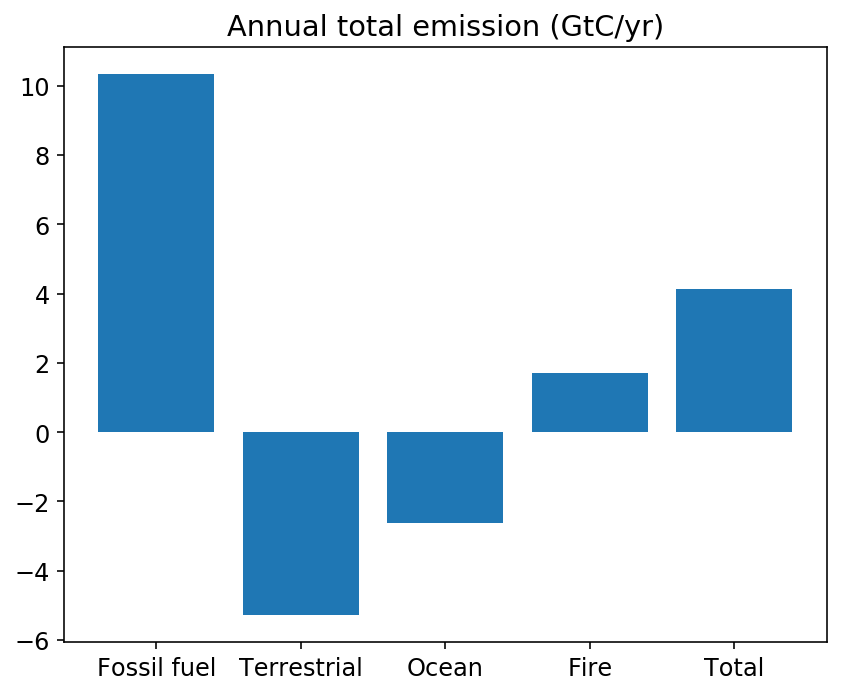

In [29]:
fig = plt.figure(figsize=[6, 5])
x = range(5)

plt.bar(x, annual_totals)
plt.xticks(x, annual_total_names)

plt.title('Annual total emission (GtC/yr)')

fig.tight_layout()
output_dir = '/geos/u73/msadiq/GEOS-Chem/analysis/inversion/data'
fig.savefig(output_dir + '/total_emissions.png', dpi = 300)